202311_jedha_bloc3_ChallengeML
Beraud Mélanie

www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !


# Import libraries

In [210]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.subplots import make_subplots
# Ma palette pour les plotly
pio.templates["mel_purple"] = go.layout.Template(
    layout_colorway=['#FF34B3', '#CD2990', '#8B1C62', '#CD00CD', '#8B008B', '#8968CD', '#5D478B','#20B2AA']) #'#EEA2AD', trop proche

pio.templates.default = "mel_purple"
pio.renderers.default = 'notebook_connected' # to be replaced by "iframe" if working on JULIE

from IPython.display import display

# Read file with labels

In [70]:
# no need to run for EDA
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)


# Preprocessng des new_user as category
data.new_user = data.new_user.astype('category')
data.info()

# super clean : 4 categories for country + 3 categories for source
# Target = converted 0/1 -classification

Set with labels (our train+test) : (284580, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   country              284580 non-null  object  
 1   age                  284580 non-null  int64   
 2   new_user             284580 non-null  category
 3   source               284580 non-null  object  
 4   total_pages_visited  284580 non-null  int64   
 5   converted            284580 non-null  int64   
dtypes: category(1), int64(3), object(2)
memory usage: 11.1+ MB


In [5]:
data.head()

'''
data.columns
Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')
'''

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [15]:
data.describe(include = 'all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.0,284580,284580.000000,284580.000000
unique,4,NaN,2.0,3,NaN,NaN
top,US,NaN,1.0,Seo,NaN,NaN
freq,160124,NaN,195066.0,139477,NaN,NaN
mean,NaN,30.564203,NaN,NaN,4.873252,0.032258
std,NaN,8.266789,NaN,NaN,3.341995,0.176685
min,NaN,17.000000,NaN,NaN,1.000000,0.000000
25%,NaN,24.000000,NaN,NaN,2.000000,0.000000
50%,NaN,30.000000,NaN,NaN,4.000000,0.000000
75%,NaN,36.000000,NaN,NaN,7.000000,0.000000


In [ ]:
# No need anymore ...

data.info() # No Null values
data.new_user.astype('category')
data.info()

for col in data.columns:
    print(col, data[col].value_counts(dropna=False))

# super clean : 4 categories for country + 3 categories for source
# Target = converted 0/1 -classification

# EDA

In [72]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)
data_sample.new_user = data_sample.new_user.astype('category')
data_sample.dtypes

#TO WORK without importing dataset
data_sample.to_csv('data_sample.csv') 

In [73]:
data_sample.new_user.value_counts(dropna=False)

new_user
1    6922
0    3078
Name: count, dtype: int64

In [78]:
data_sample = pd.read_csv('data_sample.csv', index_col=0)
data_sample.new_user = data.new_user.astype('category')

'''
Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')
'''

data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 179667 to 275284
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   country              10000 non-null  object  
 1   age                  10000 non-null  int64   
 2   new_user             10000 non-null  category
 3   source               10000 non-null  object  
 4   total_pages_visited  10000 non-null  int64   
 5   converted            10000 non-null  int64   
dtypes: category(1), int64(3), object(2)
memory usage: 478.6+ KB


In [79]:
data_sample.new_user.value_counts(dropna=False)

new_user
1    6922
0    3078
Name: count, dtype: int64

In [ ]:
# Pairwise dependencies _ no need here
fig = px.scatter_matrix(data_sample)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height = 1200, width = 1200)
fig.show()

In [64]:
# recovery of num features and cat features
num_features = []
cat_features = []

for col in data_sample:
    if data_sample[col].dtypes == 'int64' or data_sample[col].dtypes == 'float64':
        num_features.append(col)
    else:
        cat_features.append(col)

num_features = num_features[:-1]
num_features, cat_features


(['age', 'total_pages_visited'], ['country', 'new_user', 'source'])

In [76]:
data_sample.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.0,10000,10000.000000,10000.000000
unique,4,NaN,2.0,3,NaN,NaN
top,US,NaN,1.0,Seo,NaN,NaN
freq,5600,NaN,6922.0,4840,NaN,NaN
mean,NaN,30.616500,NaN,NaN,4.782500,0.028300
std,NaN,8.352641,NaN,NaN,3.221216,0.165837
min,NaN,17.000000,NaN,NaN,1.000000,0.000000
25%,NaN,24.000000,NaN,NaN,2.000000,0.000000
50%,NaN,30.000000,NaN,NaN,4.000000,0.000000
75%,NaN,36.000000,NaN,NaN,6.000000,0.000000


In [77]:
data_sample.new_user.value_counts(dropna=False)


new_user
1    6922
0    3078
Name: count, dtype: int64

In [80]:

''' Nope... sert à en mettre plusieurs à côté
fig, ax = plt.subplots(1,2, figsize=(20, 10))
for axi in ax.flatten():  # enumerate - 0 pour histogramme et 1 box
    axi.hist(data_sample[col])
'''

for col in num_features:
    fig = make_subplots(rows = 1, cols = 2)#, figsize=[10,20])

    fig.add_trace(px.histogram(data_sample[col]).data[0], row = 1, col=1)
    fig.add_trace(px.box(data_sample[col]).data[0], row = 1, col=2)
    fig.update_layout(title=f'Distribution {col}', font=dict(size=20), title_font_color="#8B1C62", 
                    showlegend=False, width=800, height =400)


    display(fig)

   
    # ne fonctionne pas avec fig, axs & ax[0], ou ax[0,0], ne fonctionne pas avec fig, '(ax1, ax2) et ax1= 


for col in cat_features:
    fig = px.histogram(data_sample[col], title=f'Distribution {col}')
    fig.update_layout(title=f'Distribution {col}', font=dict(size=20), title_font_color="#8B1C62", 
                    showlegend=False, width=800, height =400)
    fig.show()





In [120]:
data.age.mean(), data.age.max()
px.histogram(data.age)

px.histogram(data.age[data['age']>60])

# Garder en tête : Il y a des ousiders en age : 110 et 120 ans

### Garder en tête : Il y a des ousiders en age : 110 et 120 ans. Record reconnu de tous les ltemps : Jeanne Calmant 121 ans.

In [ ]:
# doesn't work

'''
import ipywidgets as ipw

VBox([HBox([fw1, fw2]), HBox([fw3])])
'''

fig2 = make_subplots(rows = 1, cols = 3) # doesnt' work

for col in cat_features:
    
    #gra = px.histogram(data_sample[col], title=f'Distribution {col}')
    #fig2.get_subplot(row = 1, col = 1, subplots = gra)
    #fig2 =  ipw.HBox([gra])                  
    fig2.add_traces(px.histogram(data_sample[col]), rows = 0, cols =1)#, title=f'Distribution {col}')
    #update_layout(title=f'Distribution {col}', font=dict(size=20), title_font_color="#8B1C62", 
#                    showlegend=False, width=800, height =400)
fig2.show()

### Preprocessing before separation :
No NaN, encoding cat = ok
### Preprocessing after separation:
OneHotEncoder for 3 cat, norm for 2 num

# Preparing set for train and validation and preprocessings

In [215]:
#Features, target
X = data.drop('converted', axis = 1)
Y = data.loc[:, 'converted']
print(type(X), X.shape, type(Y), Y.shape)


# Train_val split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)

X_train[0:5], y_train[0:5], X_val[0:5], y_val[0:5], y_train.value_counts(), y_val.value_counts()

<class 'pandas.core.frame.DataFrame'> (284580, 5) <class 'pandas.core.series.Series'> (284580,)


(       country  age new_user  source  total_pages_visited
 137434   China   19        1     Seo                    1
 112323      US   33        1  Direct                    5
 143261      US   51        1     Ads                    2
 162328   China   17        0     Seo                    1
 158039   China   28        1     Seo                    5,
 137434    0
 112323    0
 143261    0
 162328    0
 158039    0
 Name: converted, dtype: int64,
        country  age new_user  source  total_pages_visited
 138303      UK   34        1     Ads                    1
 133130      UK   32        0     Ads                    5
 245758      US   44        1     Ads                    1
 185267      US   35        1  Direct                    1
 177637      US   29        1  Direct                    3,
 138303    0
 133130    0
 245758    0
 185267    0
 177637    0
 Name: converted, dtype: int64,
 converted
 0    220320
 1      7344
 Name: count, dtype: int64,
 converted
 0    55080
 1     1

In [217]:
print(X_train.age[0:5], X_val.age[0:5], X_train.columns, X_val.columns)

# Preprocessings
norm = StandardScaler()
encod = OneHotEncoder(drop="first")

preprocesseur = ColumnTransformer(transformers=[
    ('num', norm, num_features),
    ('cat', encod, cat_features)])


X_train = preprocesseur.fit_transform(X_train)
X_val = preprocesseur.transform(X_val)

print(X_train[0:5], X_val[0:5]) # ok

137434    19
112323    33
143261    51
162328    17
158039    28
Name: age, dtype: int64 138303    34
133130    32
245758    44
185267    35
177637    29
Name: age, dtype: int64 Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object') Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')
[[-1.3990984  -1.15935344  0.          0.          0.          1.
   0.          1.        ]
 [ 0.29299544  0.03743241  0.          0.          1.          1.
   1.          0.        ]
 [ 2.46854467 -0.86015697  0.          0.          1.          1.
   0.          0.        ]
 [-1.64082609 -1.15935344  0.          0.          0.          0.
   0.          1.        ]
 [-0.31132378  0.03743241  0.          0.          0.          1.
   0.          1.        ]] [[ 0.41385929 -1.15935344  0.          1.          0.          1.
   0.          0.        ]
 [ 0.1721316   0.03743241  0.          1.          0.          0.
   0.          0.      

In [218]:
liste_features_name = []
'''
array(['num__age', 'num__total_pages_visited', 'cat__country_China',
       'cat__country_Germany', 'cat__country_UK', 'cat__country_US',
       'cat__new_user_0', 'cat__new_user_1', 'cat__source_Ads',
       'cat__source_Direct', 'cat__source_Seo'], dtype=object)
'''
for name in preprocesseur.get_feature_names_out():
       liste_features_name.append(name[5:])

liste_features_name, liste_features_name[0], liste_features_name[1]


(['age',
  'total_pages_visited',
  'country_Germany',
  'country_UK',
  'country_US',
  'new_user_1',
  'source_Direct',
  'source_Seo'],
 'age',
 'total_pages_visited')

In [219]:
train_sample = pd.DataFrame(X_train[:,:2], columns = [liste_features_name[0], liste_features_name[1]]).sample(10000)
val_sample = pd.DataFrame(X_val[:,:2], columns = [liste_features_name[0], liste_features_name[1]]).sample(10000)
#val_sample.head()

print(train_sample.shape, val_sample.shape)


fig = make_subplots(rows = 1, cols = 4)#, figsize=[10,20])

fig.add_trace(px.histogram(train_sample[liste_features_name[0]]).data[0], row = 1, col=1)
fig.add_trace(px.histogram(train_sample[liste_features_name[1]]).data[0], row = 1, col=2)
fig.add_trace(px.histogram(val_sample[liste_features_name[0]]).data[0], row = 1, col=3)
fig.add_trace(px.histogram(val_sample[liste_features_name[1]]).data[0], row = 1, col=4)
fig.update_layout(showlegend=False, width=1200, height =400)


display(fig)


(10000, 2) (10000, 2)


# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

## Training pipeline

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

X_train accuracy:0.9863307330100499,
X_val accuracy:0.9857685009487666

X_train F1:0.7654507084715104,
X_val F1:0.7554347826086957
Features_importance:


Confusion Matrix:


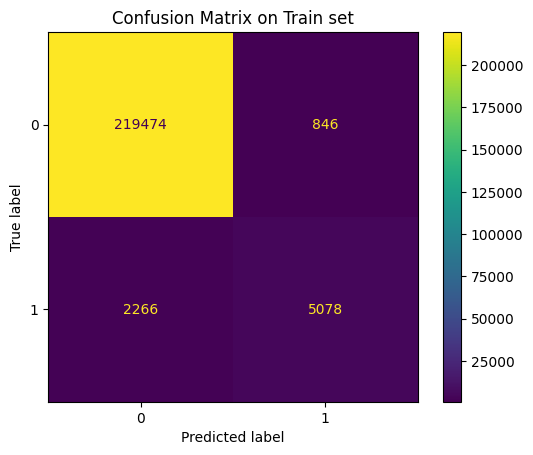

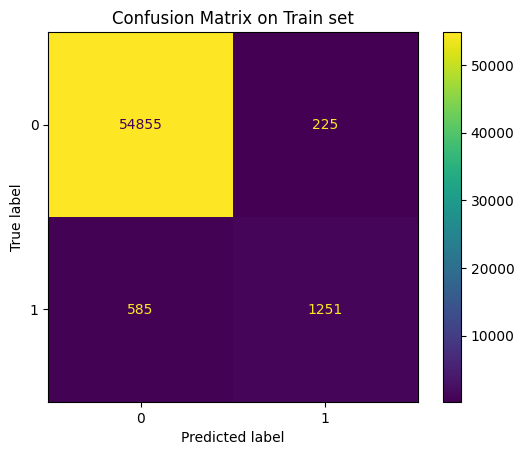

In [220]:
# Train model

classifier = LogisticRegression() # 
classifier.fit(X_train, y_train)

list_params = classifier.get_params()
print(list_params)

classifier.score(X_train, y_train)
print(f"\nX_train accuracy:{classifier.score(X_train, y_train)},\n\
X_val accuracy:{classifier.score(X_val, y_val)}\n")

# Predictions & F1
y_train_pred = classifier.predict(X_train)
y_val_pred = classifier.predict(X_val)

print(f'X_train F1:{f1_score(y_train, y_train_pred)},\n\
X_val F1:{f1_score(y_val,y_val_pred)}')

# coeff importance:
print('Features_importance:')
feat_imp = pd.DataFrame([coef for coef in classifier.coef_], columns=liste_features_name)
feat_imp

temp = feat_imp.transpose()
fig = px.bar(temp, x = abs(temp[0]), orientation='h', color=temp[0])
fig.update_layout(showlegend=False, title=f'Feature importance', font=dict(size=15), title_font_color="#8B1C62", margin=dict(l=150, r=20, t=50, b=40))
fig.update_yaxes(title = None)
fig.show()

# Confusion matrix
print('Confusion Matrix:')
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_val, y_val, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()


In [224]:
# Visualize predictions on test Set
fig = px.scatter(x = X_train.flatten().tolist(), y = y_train, title = "train set")
fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = y_train_pred, name = "train_predictions"))
#fig.add_trace(go.Scatter(x = X_train.flatten().tolist(), y = y_train_proba[:,1], name = "train_probabilites"))
fig.show()

fig = px.scatter(x = X_val.flatten().tolist(), y = y_val, title = "val set")
fig.add_trace(go.Scatter(x = X_val.flatten().tolist(), y = y_val_pred, name = "val_predictions"))
#fig.add_trace(go.Scatter(x = X_val.flatten().tolist(), y = y_val_proba[:,1], name = "val_probabilites"))
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 227664, whereas the length of  previously-processed arguments ['x'] is 1821312

### Most important features 
seems to be The number of pages visited (positive correlation) and the country, the new user variable
Impact of sources is not that important, age neither.

### scores
F1 and accracy scores are basically the same for train and test

### Confusion matrice:
30% errors ont the positives labels (30% have been predicted as negative)
15% predicted neg should be true.

We need to work on the 30% errors...
Try with a gradient ?



In [ ]:
# Fonction

classifier = LogisticRegression() # 
classifier.fit(X_train, y_train)

def model_pipeline(model):

    model.fit(X_train, y_train)

    list_params = classifier.get_params()
    print(list_params)

    classifier.score(X_train, y_train)
    print(f"\nX_train accuracy:{classifier.score(X_train, y_train)},\n\
    X_val accuracy:{classifier.score(X_val, y_val)}\n")

    # Predictions & F1
    y_train_pred = classifier.predict(X_train)
    y_val_pred = classifier.predict(X_val)

    print(f'X_train F1:{f1_score(y_train, y_train_pred)},\n\
    X_val F1:{f1_score(y_val,y_val_pred)}')

    # coeff importance:
    print('Features_importance:')
    feat_imp = pd.DataFrame([coef for coef in classifier.coef_], columns=liste_features_name)
    feat_imp

    temp = feat_imp.transpose()
    fig = px.bar(temp, x = abs(temp[0]), orientation='h', color=temp[0])
    fig.update_layout(showlegend=False, title=f'Feature importance', font=dict(size=15), title_font_color="#8B1C62", margin=dict(l=150, r=20, t=50, b=40))
    fig.update_yaxes(title = None)
    fig.show()

# Confusion matrix
print('Confusion Matrix:')
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_val, y_val, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

## Test pipeline

In [ ]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

## Performance assessment

In [ ]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

In [ ]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [ ]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

In [ ]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

In [ ]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

In [ ]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_EXAMPLE.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**